National Parks Entrance cost (422 national park sites)

In [3]:
import requests
import json
import pandas as pd
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
visits_2019 = pd.read_csv('Data/Annual Park Visits.csv', sep = ',', skiprows = [0,1,2], thousands=',' )
visits = visits_2019.rename({'Rank': 'Rank_2019','Value': 'Visits_2019', 'PercentOfTotal': 'Percent_total_2019'}, axis = 'columns')
visits.head()# change value and percent to 2019 identifier

,ParkName,Rank_2019,Visits_2019,Percent_total_2019
0,Golden Gate NRA,1,15002227,4.58%
1,Blue Ridge PKWY,2,14976085,4.57%
2,Great Smoky Mountains NP,3,12547743,3.83%
3,Gateway NRA,4,9405622,2.87%
4,Lincoln Memorial,5,7808182,2.38%


In [5]:
NP_use = pd.read_csv('Data/National Park Public Use Statistics.csv', sep = ',', skiprows = [0,1,2], thousands=',', parse_dates= {'Month_Year': [5,6]})
NP_use.tail()

,Month_Year,ParkName,UnitCode,ParkType,Region,State,RecreationVisits,NonRecreationVisits,RecreationHours,NonRecreationHours,...,NonRecreationVisitsTotal,RecreationHoursTotal,NonRecreationHoursTotal,ConcessionerLodgingTotal,ConcessionerCampingTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal,NonRecreationOvernightStaysTotal,MiscellaneousOvernightStaysTotal
29934,2019-08-01,Zion NP,ZION,National Park,Intermountain,UT,535322,1860,3535992,1860,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619
29935,2019-09-01,Zion NP,ZION,National Park,Intermountain,UT,497443,1800,3144084,1800,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619
29936,2019-10-01,Zion NP,ZION,National Park,Intermountain,UT,429604,1860,2736509,1860,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619
29937,2019-11-01,Zion NP,ZION,National Park,Intermountain,UT,230180,1800,1543130,1800,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619
29938,2019-12-01,Zion NP,ZION,National Park,Intermountain,UT,171706,1860,1058308,1860,...,21900,28715546,5475,82640,0,118290,78704,18320,0,21619


In [6]:
print(list(NP_use.columns))

['Month_Year', 'ParkName', 'UnitCode', 'ParkType', 'Region', 'State', 'RecreationVisits', 'NonRecreationVisits', 'RecreationHours', 'NonRecreationHours', 'ConcessionerLodging', 'ConcessionerCamping', 'TentCampers', 'RVCampers', 'Backcountry', 'NonRecreationOvernightStays', 'MiscellaneousOvernightStays', 'ParkNameTotal', 'UnitCodeTotal', 'ParkTypeTotal', 'RegionTotal', 'StateTotal', 'YearTotal', 'RecreationVisitsTotal', 'NonRecreationVisitsTotal', 'RecreationHoursTotal', 'NonRecreationHoursTotal', 'ConcessionerLodgingTotal', 'ConcessionerCampingTotal', 'TentCampersTotal', 'RVCampersTotal', 'BackcountryTotal', 'NonRecreationOvernightStaysTotal', 'MiscellaneousOvernightStaysTotal']


In [7]:
NP_visit = NP_use[['Month_Year','ParkName', 'ParkType', 'Region', 'State','RecreationVisits','ConcessionerLodging', 'ConcessionerCamping', 'TentCampers', 'RVCampers', 'Backcountry']]
NP_visit.tail(12)

,Month_Year,ParkName,ParkType,Region,State,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
29927,2019-01-01,Zion NP,National Park,Intermountain,UT,98828,2999,0,1574,1649,2
29928,2019-02-01,Zion NP,National Park,Intermountain,UT,102269,2476,0,1010,732,71
29929,2019-03-01,Zion NP,National Park,Intermountain,UT,296316,5079,0,7485,7940,1111
29930,2019-04-01,Zion NP,National Park,Intermountain,UT,372349,7633,0,11081,8453,1919
29931,2019-05-01,Zion NP,National Park,Intermountain,UT,529553,6980,0,14108,9292,3266
29932,2019-06-01,Zion NP,National Park,Intermountain,UT,594896,9909,0,16098,9132,2889
29933,2019-07-01,Zion NP,National Park,Intermountain,UT,629802,8959,0,18330,9046,2081
29934,2019-08-01,Zion NP,National Park,Intermountain,UT,535322,11167,0,17568,8042,1721
29935,2019-09-01,Zion NP,National Park,Intermountain,UT,497443,8633,0,12482,8182,2007
29936,2019-10-01,Zion NP,National Park,Intermountain,UT,429604,6762,0,11009,8969,2117


In [8]:
print(list(NP_visit.columns))

['Month_Year', 'ParkName', 'ParkType', 'Region', 'State', 'RecreationVisits', 'ConcessionerLodging', 'ConcessionerCamping', 'TentCampers', 'RVCampers', 'Backcountry']


In [9]:
NP_visit['Month_Year'].dtype

dtype('<M8[ns]')

In [10]:
NP_visit.set_index(NP_visit['Month_Year'], inplace = True)
NP_visit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29939 entries, 1979-01-01 to 2019-12-01
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month_Year           29939 non-null  datetime64[ns]
 1   ParkName             29939 non-null  object        
 2   ParkType             29939 non-null  object        
 3   Region               29939 non-null  object        
 4   State                29939 non-null  object        
 5   RecreationVisits     29939 non-null  int64         
 6   ConcessionerLodging  29939 non-null  int64         
 7   ConcessionerCamping  29939 non-null  int64         
 8   TentCampers          29939 non-null  int64         
 9   RVCampers            29939 non-null  int64         
 10  Backcountry          29939 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 2.7+ MB


In [11]:
#should do some checks for missing values here

In [12]:
Zion = pd.DataFrame(NP_visit.loc[NP_visit['ParkName'] =='Zion NP',])
Zion.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 1979-01-01 to 2019-12-01
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month_Year           492 non-null    datetime64[ns]
 1   ParkName             492 non-null    object        
 2   ParkType             492 non-null    object        
 3   Region               492 non-null    object        
 4   State                492 non-null    object        
 5   RecreationVisits     492 non-null    int64         
 6   ConcessionerLodging  492 non-null    int64         
 7   ConcessionerCamping  492 non-null    int64         
 8   TentCampers          492 non-null    int64         
 9   RVCampers            492 non-null    int64         
 10  Backcountry          492 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 46.1+ KB


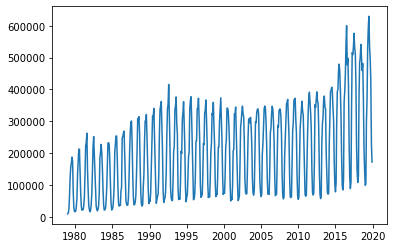

In [13]:
#make a graph for one park y='RecreationVisits' index/x= 'Month_Year'
plt.plot(Zion['RecreationVisits'])
plt.show()

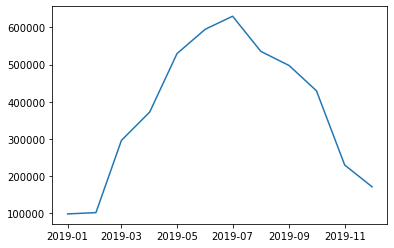

In [14]:
Zion_2019 = Zion.loc[Zion['Month_Year']['2019-01-01':'2019-12-01'],]
plt.plot(Zion_2019['RecreationVisits'])

In [15]:
Parks_unique = list(NP_visit['ParkName'].unique())
print(Parks_unique)
print(len(Parks_unique))


['Acadia NP', 'Arches NP', 'Badlands NP', 'Big Bend NP', 'Biscayne NP', 'Black Canyon of the Gunnison NP', 'Bryce Canyon NP', 'Canyonlands NP', 'Capitol Reef NP', 'Carlsbad Caverns NP', 'Channel Islands NP', 'Congaree NP', 'Crater Lake NP', 'Cuyahoga Valley NP', 'Death Valley NP', 'Denali NP & PRES', 'Dry Tortugas NP', 'Everglades NP', 'Gates of the Arctic NP & PRES', 'Gateway Arch NP', 'Glacier Bay NP & PRES', 'Glacier NP', 'Grand Canyon NP', 'Grand Teton NP', 'Great Basin NP', 'Great Sand Dunes NP & PRES', 'Great Smoky Mountains NP', 'Guadalupe Mountains NP', 'Haleakala NP', 'Hawaii Volcanoes NP', 'Hot Springs NP', 'Indiana Dunes NP', 'Isle Royale NP', 'Joshua Tree NP', 'Katmai NP & PRES', 'Kenai Fjords NP', 'Kings Canyon NP', 'Kobuk Valley NP', 'Lake Clark NP & PRES', 'Lassen Volcanic NP', 'Mammoth Cave NP', 'Mesa Verde NP', 'Mount Rainier NP', 'National Park of American Samoa', 'North Cascades NP', 'Olympic NP', 'Petrified Forest NP', 'Pinnacles NP', 'Redwood NP', 'Rocky Mountain N

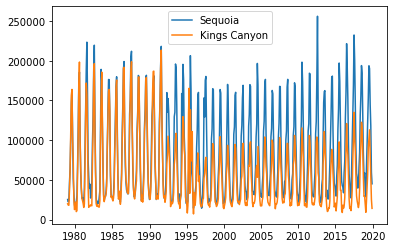

In [16]:
#'Kings Canyon NP', 'Sequoia NP' need to be combined bc they are adjacent parks
Sequoia = pd.DataFrame(NP_visit.loc[NP_visit['ParkName'] == 'Sequoia NP',])
Kings = pd.DataFrame(NP_visit.loc[NP_visit['ParkName'] == 'Kings Canyon NP',])
plt.plot(Sequoia['RecreationVisits'])
plt.plot(Kings['RecreationVisits'])
plt.legend(['Sequoia', 'Kings Canyon'])
plt.show()

In [17]:
#ParkName	ParkType	Region	State
combine = pd.concat([Sequoia, Kings])
combine.drop('Month_Year', axis = 1, inplace= True)
combine.head(1)

,ParkName,ParkType,Region,State,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
Month_Year,,,,,,,,,,
1979-01-01,Sequoia NP,National Park,Pacific West,CA,25338,1847,0,543,655,406


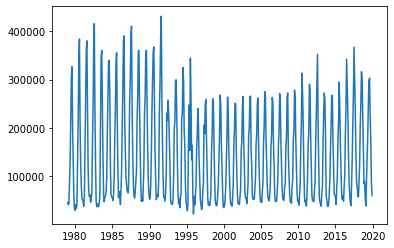

In [18]:
King_S = combine.groupby('Month_Year').agg('sum')
plt.plot(King_S['RecreationVisits'])


In [19]:
King_S.head()

,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
Month_Year,,,,,,
1979-01-01,45262,1847,0,649,780,410
1979-02-01,40576,2003,0,818,1046,179
1979-03-01,42385,2332,0,1395,1567,344
1979-04-01,84511,3191,0,3874,4363,875
1979-05-01,127631,7347,0,10720,9605,3142


In [20]:
add_cols = {'ParkName': 'Sequoia and Kings Canyon NP' , 'ParkType': 'National Park' , 'Region': 'Pacific West', 'State': 'CA'}
for key, value in add_cols.items():
    King_S[key] = value
King_S.head()

,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry,ParkName,ParkType,Region,State
Month_Year,,,,,,,,,,
1979-01-01,45262,1847,0,649,780,410,Sequoia and Kings Canyon NP,National Park,Pacific West,CA
1979-02-01,40576,2003,0,818,1046,179,Sequoia and Kings Canyon NP,National Park,Pacific West,CA
1979-03-01,42385,2332,0,1395,1567,344,Sequoia and Kings Canyon NP,National Park,Pacific West,CA
1979-04-01,84511,3191,0,3874,4363,875,Sequoia and Kings Canyon NP,National Park,Pacific West,CA
1979-05-01,127631,7347,0,10720,9605,3142,Sequoia and Kings Canyon NP,National Park,Pacific West,CA


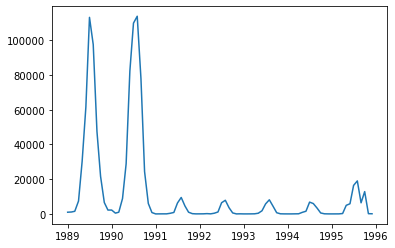

In [21]:
#something is wrong starting here. found a tourism article that says 40,000 people visited in 2019. pics look beautiful/mountainous. 
#maybe reported units in thousands of visitors missing zeros?
#maybe they got rid of some activity that used to draw more people, or counting method
Ncascades = pd.DataFrame(NP_visit.loc[NP_visit['ParkName'] == 'North Cascades NP',])
Ncasc_90s = Ncascades.loc[Ncascades ['Month_Year']['1989-01-01':'1995-12-01'],]
plt.plot(Ncasc_90s['RecreationVisits'])

In [22]:
#from other df of 2019 visitation data 
visits.loc[visits['ParkName'].str.contains('Cascades')]

,ParkName,Rank_2019,Visits_2019,Percent_total_2019
305,North Cascades NP,306,38208,0.01%


In [23]:
#Ncasc_90s.tail(50)

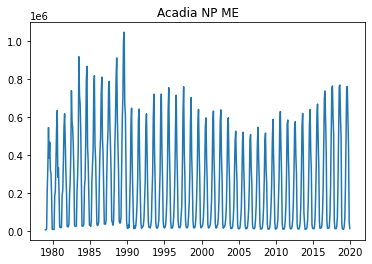

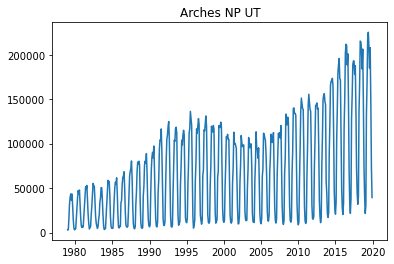

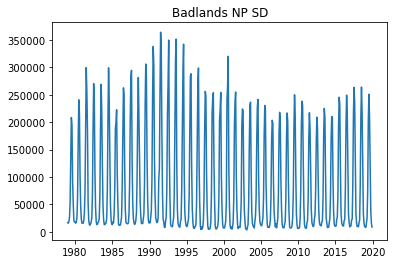

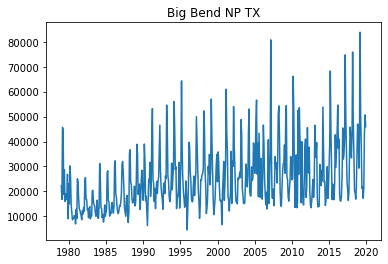

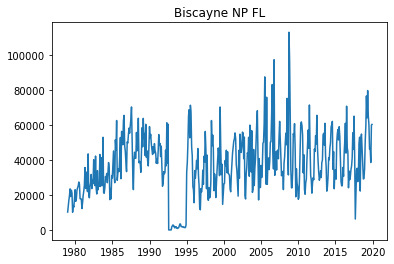

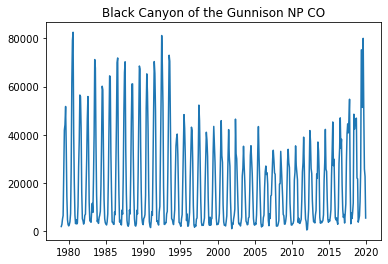

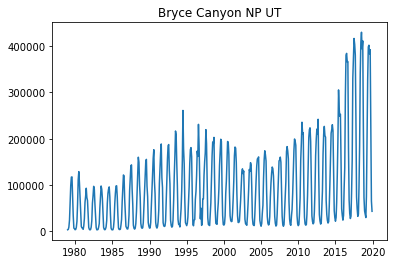

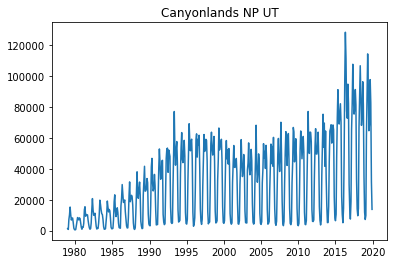

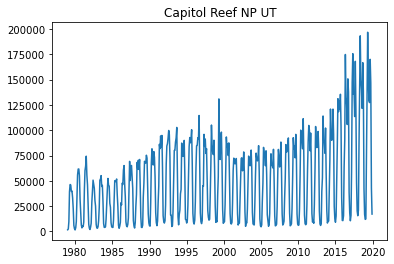

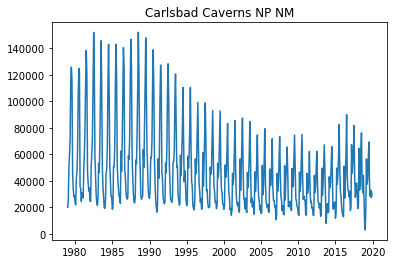

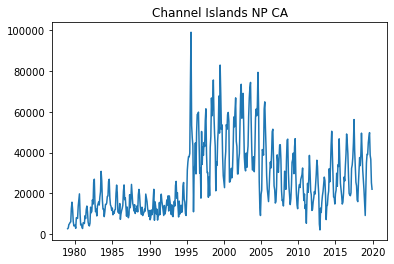

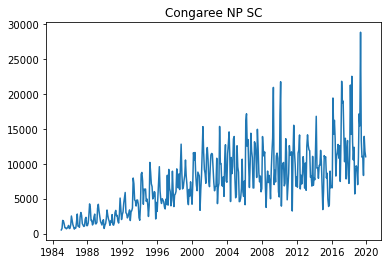

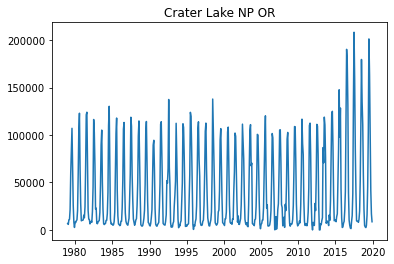

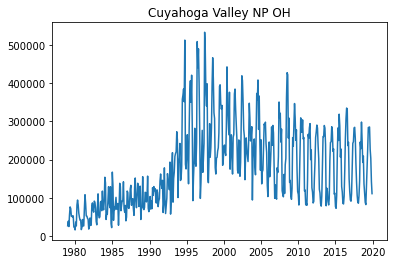

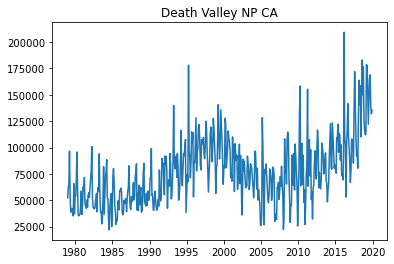

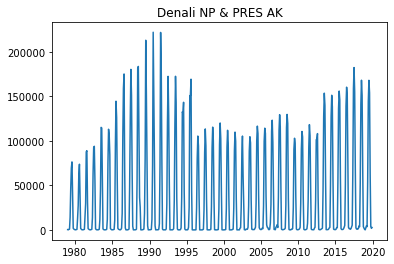

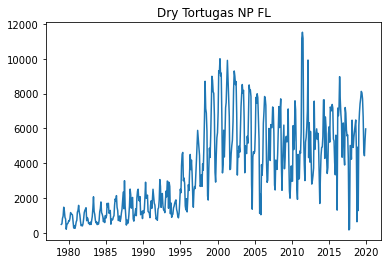

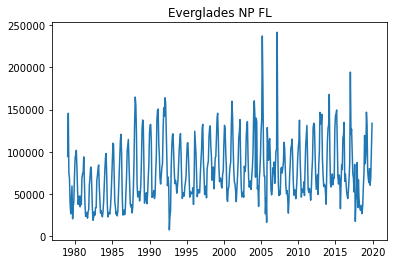

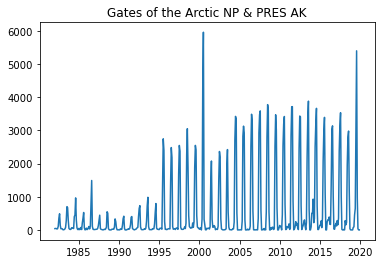

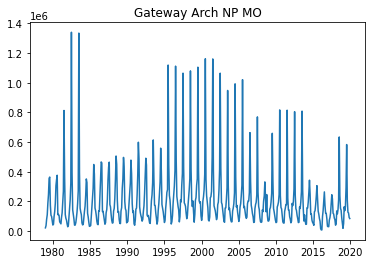

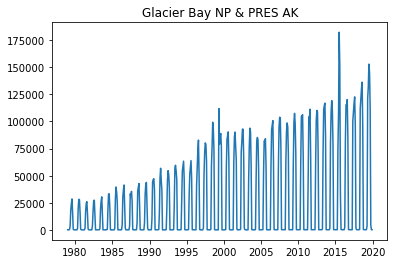

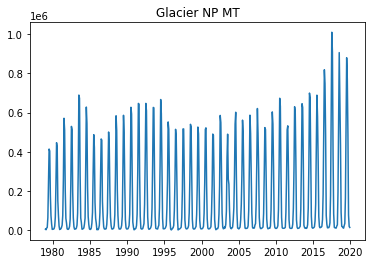

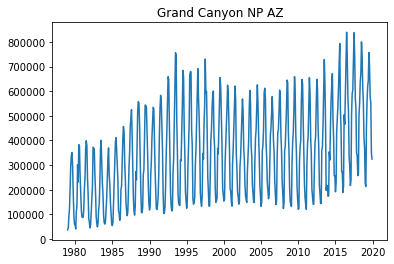

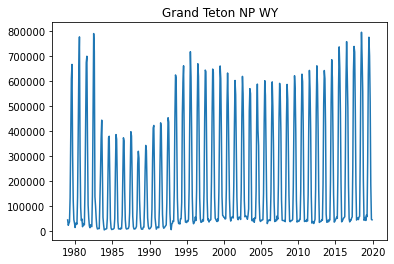

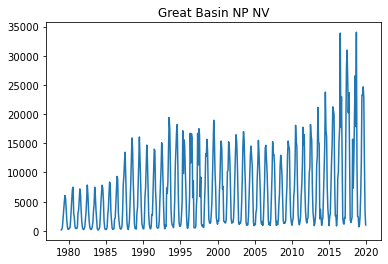

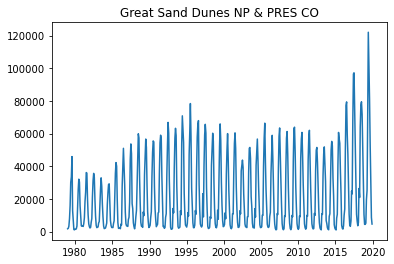

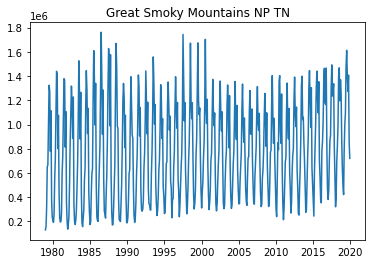

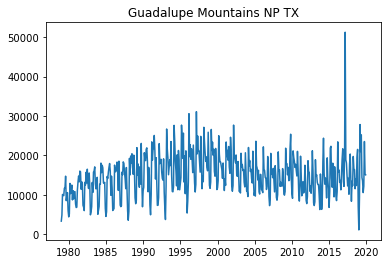

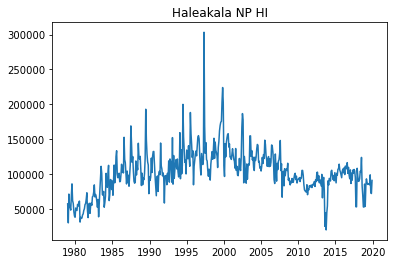

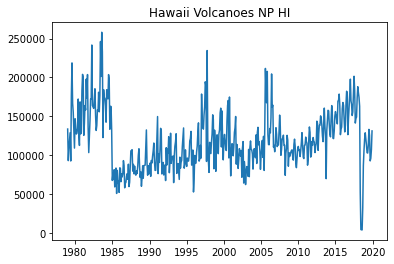

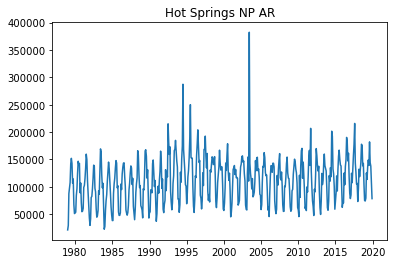

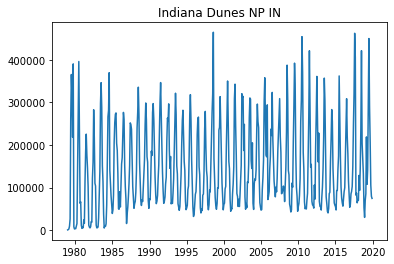

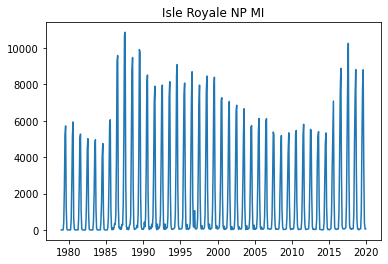

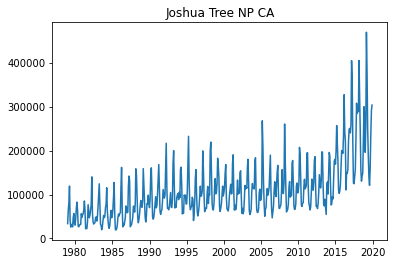

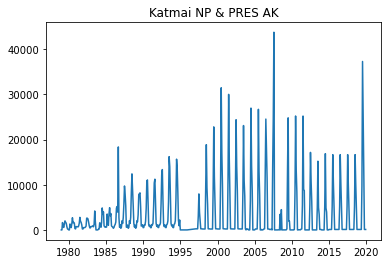

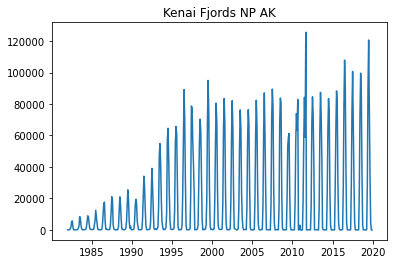

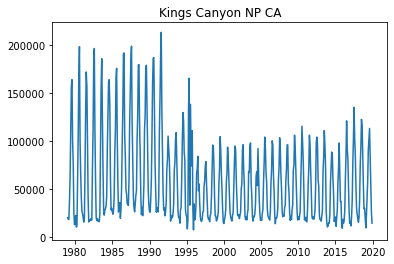

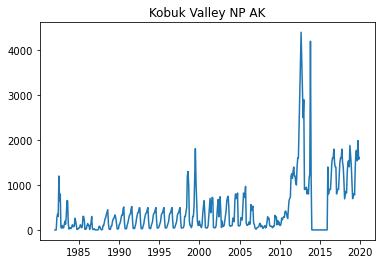

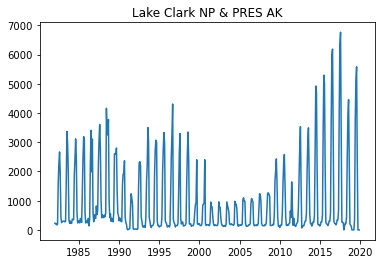

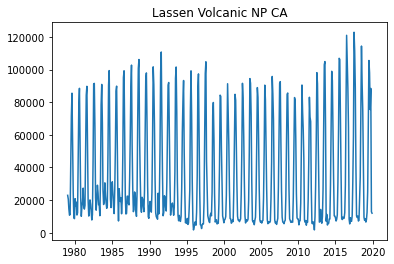

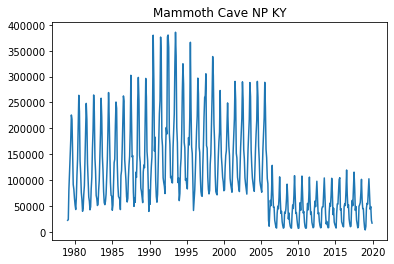

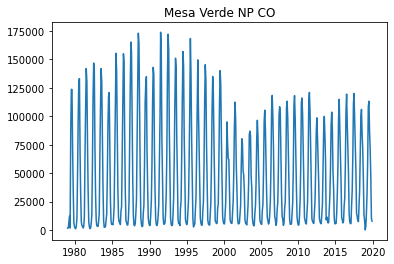

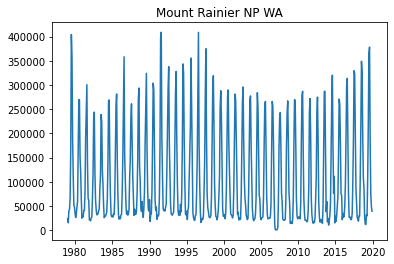

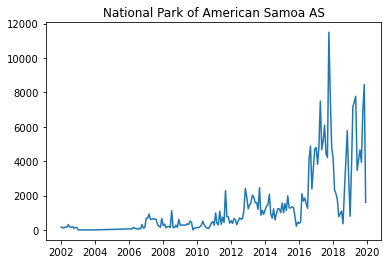

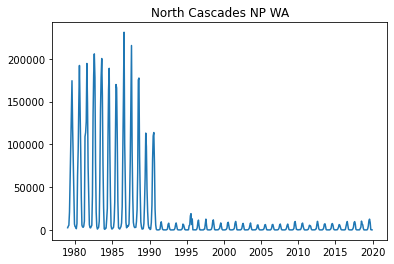

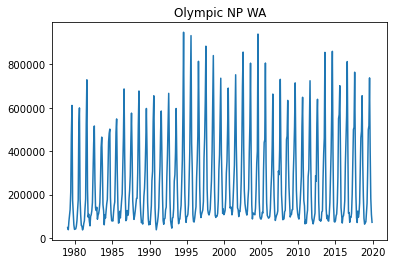

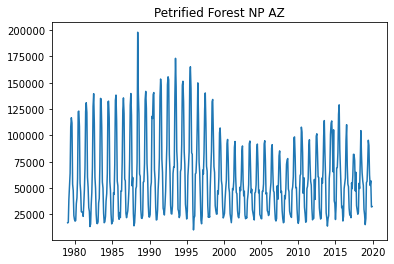

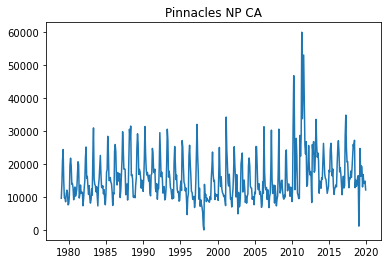

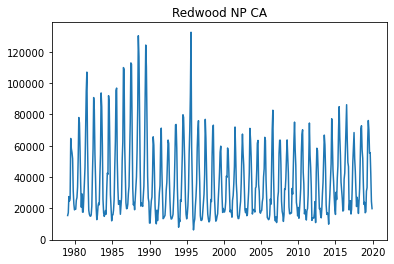

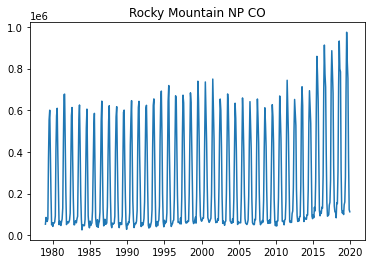

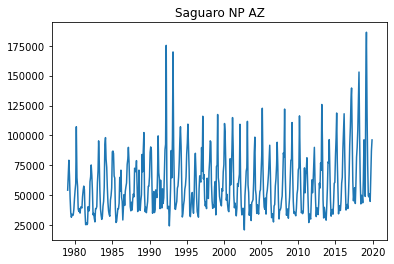

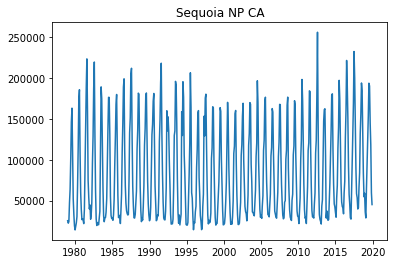

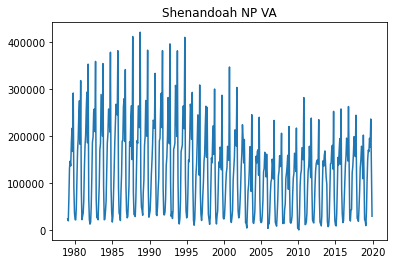

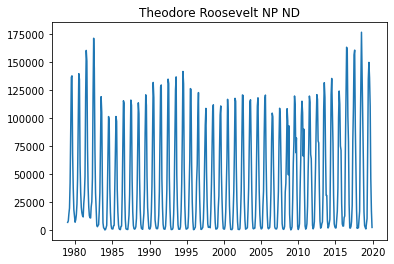

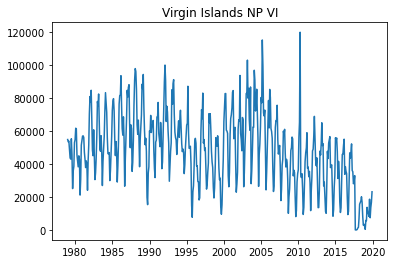

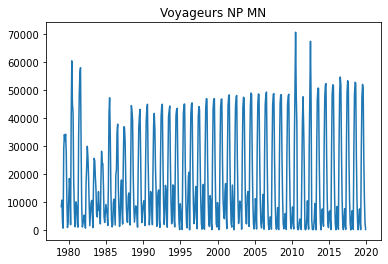

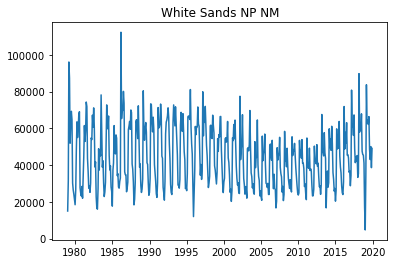

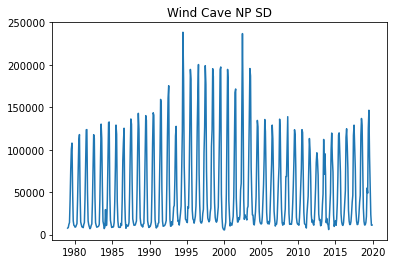

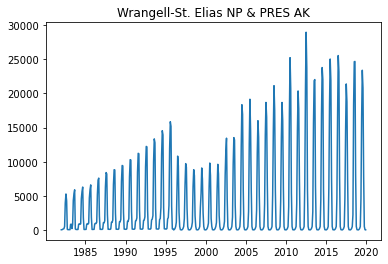

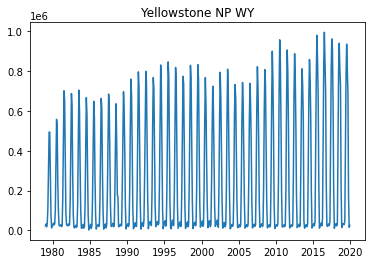

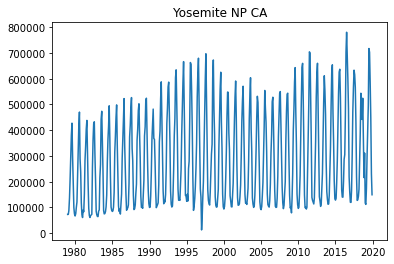

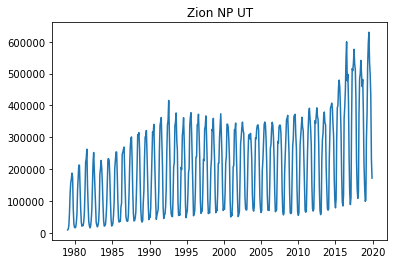

In [24]:
# graph visits over time for one park then make a for loop to iterate through the list of 62 NPs
for park in Parks_unique:
    park_df = pd.DataFrame(NP_visit.loc[NP_visit['ParkName'] == park,])
    plt.plot(park_df['RecreationVisits'])
    plt.title(park + " " + park_df['State'][0])
    plt.show()

In [25]:
NP_visit.head()

,Month_Year,ParkName,ParkType,Region,State,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
Month_Year,,,,,,,,,,,
1979-01-01,1979-01-01,Acadia NP,National Park,Northeast,ME,6011,0,0,102,13,0
1979-02-01,1979-02-01,Acadia NP,National Park,Northeast,ME,5243,0,0,53,8,0
1979-03-01,1979-03-01,Acadia NP,National Park,Northeast,ME,11165,0,0,176,37,0
1979-04-01,1979-04-01,Acadia NP,National Park,Northeast,ME,219351,0,0,1037,459,0
1979-05-01,1979-05-01,Acadia NP,National Park,Northeast,ME,339416,0,0,3193,1148,0


In [26]:
#drop Month_Year column,keep index, append King_S, drop Kings Canyon and Sequoia
NP_visit1 = NP_visit.drop('Month_Year', axis = 'columns')
#parks = parks.drop(parks[parks['park']== 'Kings Canyon National Park'].index)
NP_visit1.shape

(29939, 10)

In [27]:
NP_visit1 = NP_visit1.append(King_S)
NP_visit1.shape

(30431, 10)

In [28]:
NP_visit1.reset_index(inplace = True)
NP_visit1.head()

,Month_Year,ParkName,ParkType,Region,State,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
0,1979-01-01,Acadia NP,National Park,Northeast,ME,6011,0,0,102,13,0
1,1979-02-01,Acadia NP,National Park,Northeast,ME,5243,0,0,53,8,0
2,1979-03-01,Acadia NP,National Park,Northeast,ME,11165,0,0,176,37,0
3,1979-04-01,Acadia NP,National Park,Northeast,ME,219351,0,0,1037,459,0
4,1979-05-01,Acadia NP,National Park,Northeast,ME,339416,0,0,3193,1148,0


In [29]:
#get rid of Kings and Sequoia
NP_visit1 = NP_visit1.drop(NP_visit1[NP_visit1['ParkName']=='Kings Canyon NP'].index)
NP_visit1 = NP_visit1.drop(NP_visit1[NP_visit1['ParkName']=='Sequoia NP'].index)
NP_visit1.shape

(29447, 11)

In [30]:
#save above to merge
NP_visit2 = NP_visit1
NP_visit2['Month_Year'] = NP_visit2['Month_Year'].dt.strftime('%Y-%m')
NP_visit2.head()

,Month_Year,ParkName,ParkType,Region,State,RecreationVisits,ConcessionerLodging,ConcessionerCamping,TentCampers,RVCampers,Backcountry
0,1979-01,Acadia NP,National Park,Northeast,ME,6011,0,0,102,13,0
1,1979-02,Acadia NP,National Park,Northeast,ME,5243,0,0,53,8,0
2,1979-03,Acadia NP,National Park,Northeast,ME,11165,0,0,176,37,0
3,1979-04,Acadia NP,National Park,Northeast,ME,219351,0,0,1037,459,0
4,1979-05,Acadia NP,National Park,Northeast,ME,339416,0,0,3193,1148,0


In [31]:
NP_visit2.shape

(29447, 11)

In [32]:
#NP_visit2.to_csv('Data/NP_visit_for_merge.csv')

In [28]:
new = NP_visit1.filter(['ParkName', 'State'], axis = 1)
#new.reset_index(inplace= True)
new.head()

,ParkName,State
0,Acadia NP,ME
1,Acadia NP,ME
2,Acadia NP,ME
3,Acadia NP,ME
4,Acadia NP,ME


In [29]:
#new.drop('Month_Year', axis = 1, inplace = True)

In [30]:
new.drop_duplicates(ignore_index = True, inplace = True)
new.head()

,ParkName,State
0,Acadia NP,ME
1,Arches NP,UT
2,Badlands NP,SD
3,Big Bend NP,TX
4,Biscayne NP,FL


In [31]:
new['Park']= new['ParkName']
new['ParkName'] = new['ParkName'].str.rstrip(' & PRES')
new['ParkName'] = new['ParkName'].str.rstrip('NP')
new.head()

,ParkName,State,Park
0,Acadia,ME,Acadia NP
1,Arches,UT,Arches NP
2,Badlands,SD,Badlands NP
3,Big Bend,TX,Big Bend NP
4,Biscayne,FL,Biscayne NP


In [32]:
#space leftover from above
new['park'] = new['ParkName']+ 'National Park'

In [33]:
new.head()

,ParkName,State,Park,park
0,Acadia,ME,Acadia NP,Acadia National Park
1,Arches,UT,Arches NP,Arches National Park
2,Badlands,SD,Badlands NP,Badlands National Park
3,Big Bend,TX,Big Bend NP,Big Bend National Park
4,Biscayne,FL,Biscayne NP,Biscayne National Park


In [34]:
#This makes the csv with the park names to join with the animal observation data
#new.to_csv('Data/parks_unique.csv')

In [148]:
new.loc[new['ParkName'].str.contains('Kings')]

,ParkName,State,Park,park
60,Sequoia and Kings Canyon,CA,Sequoia and Kings Canyon NP,Sequoia and Kings Canyon National Park
